In [1]:
#libraries
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
#OR-library
# prices = pd.read_csv('E:\\python apps\\optimization_models\\OR-library-IT\\indtrack1-31-290.csv').drop('Unnamed: 0', axis=1)#hengseng
prices = pd.read_csv('E:\\python apps\\optimization_models\\OR-library-IT\\indtrack2-85-290.csv').drop('Unnamed: 0', axis=1)#DAX
# prices = pd.read_csv('E:\\python apps\\optimization_models\\OR-library-IT\\indtrack3-89-290.csv').drop('Unnamed: 0', axis=1)#FTSE
# prices = pd.read_csv('E:\\python apps\\optimization_models\\OR-library-IT\\indtrack4-98-290.csv').drop('Unnamed: 0', axis=1)#S&P100
# prices = pd.read_csv('E:\\python apps\\optimization_models\\OR-library-IT\\indtrack5-225-290.csv').drop('Unnamed: 0', axis=1)#Nikkie225
# prices = pd.read_csv('E:\\python apps\\optimization_models\\OR-library-IT\\indtrack6-457-290.csv').drop('Unnamed: 0', axis=1)#S&P500
# prices = pd.read_csv('E:\\python apps\\optimization_models\\OR-library-IT\\indtrack7-1318-290.csv').drop('Unnamed: 0', axis=1)#russel1000
corr = np.array(prices.pct_change().corr())
prices

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1518.028832,163.490940,190.569695,48.538078,122.481811,1973.166513,131.974833,74.580238,520.497684,663.329480,...,655.909646,116.880564,787.448018,47.337810,74.016477,82.872994,423.548830,141.049580,994.930569,1540.524749
1,1517.392327,171.310862,191.115271,49.974761,124.027609,1969.893057,131.429257,70.088329,517.005998,668.585195,...,637.723780,115.298393,745.620525,47.028651,73.198113,83.054852,431.914329,141.686086,1008.897314,1533.432261
2,1503.225537,169.364974,190.569695,48.629007,124.027609,1911.079964,130.865495,73.289042,506.530939,675.586754,...,644.525294,115.298393,741.983352,46.719491,71.834173,79.981441,426.094852,140.722235,949.538646,1560.038184
3,1507.499216,174.238787,189.678587,48.465334,122.754599,1902.914510,130.956424,73.289042,517.005998,669.458117,...,647.926051,112.679629,756.532045,46.519446,72.016031,80.999849,423.912548,138.321700,953.030333,1577.751218
4,1489.058747,172.365642,186.968893,50.302107,123.663892,1915.990148,128.628634,68.160628,505.658017,659.837793,...,646.052907,117.917158,751.076285,45.137321,71.925102,79.981441,396.270030,135.430148,973.980451,1560.038184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,3027.892211,140.031172,281.880930,781.446682,121.845305,1055.689549,205.682150,372.810263,649.235433,283.699517,...,1443.957798,141.849759,451.373206,123.572963,150.033398,99.112972,773.808619,74.198335,1131.160895,2955.203302
287,2895.153571,136.212140,300.066797,751.076285,114.389100,991.129723,191.860891,365.535916,581.947727,265.149933,...,1363.030692,135.484705,435.551502,113.843524,132.574967,94.020930,754.713459,73.652759,1081.149762,2673.322372
288,3026.691943,129.210581,296.429624,801.996712,115.480252,972.943856,199.953602,365.899633,618.319460,264.604357,...,1400.675436,130.938239,435.915219,119.208355,147.305518,96.930668,791.994485,72.834395,1035.685096,2818.809304
289,2858.781838,126.391772,287.336690,768.352859,113.388877,945.665057,190.042305,363.717330,641.961087,256.420717,...,1380.307265,132.393108,434.278491,106.205460,142.031617,93.293495,743.801939,72.834395,1023.864283,2927.924502


In [98]:
import pyomo.environ as pyo
model = pyo.ConcreteModel()
#data shape
N = prices.shape[1]-1
model.N = pyo.Param(initialize = prices.shape[1]-1) #universe of assets #all dataset - index itself
#index sets
model.i = pyo.Set(initialize = np.arange(model.N))#index for stocks
model.j = pyo.Set(initialize = np.arange(model.N))#index for stocks
#parameters
model.ru = pyo.Param(model.i,model.j , initialize = lambda m ,i,j: corr[i,j])
model.q  = pyo.Param(initialize = 10)
# variables
model.y = pyo.Var(model.i,domain = pyo.Binary)
model.x = pyo.Var(model.i,model.j,domain = pyo.Binary) 


# #constructing model
def Obj(model):
    return sum(model.ru[i,j]*model.x[i,j]     for i in model.i for j in model.j) #index tracking 
def Co2(model): #cardinality constraint
    return sum(model.y[i] for i in model.i) == model.q
def Co3(model,i): #every asset should have one representation in the portfolio 
    return sum(model.x[i,j]  for j in model.j) == 1
def Co4(model,i,j): #Only assets that is in portfolio should have representation 
    return (model.x[i,j]) <= model.y[j]    
 
    
model.obj = pyo.Objective(rule = Obj,sense = pyo.maximize)
model.Co2 = pyo.Constraint(rule = Co2)
model.Co3 = pyo.Constraint(model.i,rule = Co3)
model.Co6A = pyo.Constraint(model.i,model.j,rule = Co4)




In [99]:
solver = pyo.SolverFactory('gams')
results = solver.solve(model,solver = 'cplex',add_options = ['GAMS_MODEL.reslim = 100'])
model.display()

Model unknown

  Variables:
    y : Size=85, Index=i
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   1.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   0.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   1.0 :     1 : False : False : Binary
          8 :     0 :   0.0 :     1 : False : False : Binary
          9 :     0 :   0.0 :     1 : False : False : Binary
         10 :     0 :   0.0 :     1 : False : False : Binary
         11 :     0 :   0.0 :     1 : False : False : Binary
         12 :     0 :   0.0 :     1 : False : False : Binary
         13 :     0 :   0.0 :     1 : False : False : Binary
         14 :     0 :   0.0 :   

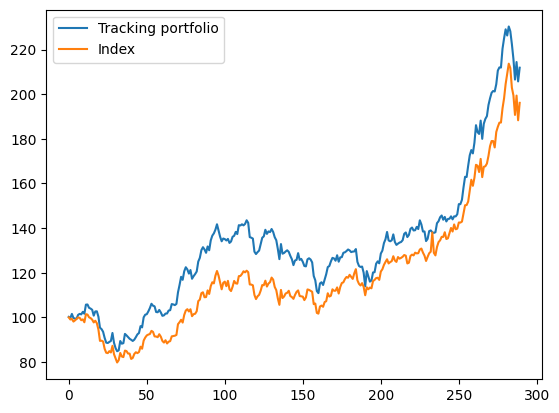

In [100]:
y = np.array([model.y[j].value for j in model.j])
w = y*(1/model.q) 
r = np.array(prices.drop('0',axis=1).pct_change().drop(0,axis=0))
r_portfolio = [w@r[i] for i in range(len(r))]
benchmark = list(prices['0'].pct_change().drop(0,axis=0))
tracking = []
index = []
tracking.append( 100*(1+r_portfolio[0]))
index.append(100*(1+benchmark[0]))
for i in range(1,len(benchmark)):
    tracking.append(tracking[i-1]*(1+r_portfolio[i]))
    index.append(index[i-1]*(1+benchmark[i]))
plt.plot(tracking,label = 'Tracking portfolio')
plt.plot(index,label = 'Index')
plt.legend()
plt.show()